In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-05-19 16:50:17.315395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 16:50:17.319261: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 16:50:17.331598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747691417.352541    8998 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747691417.358985    8998 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747691417.375084    8998 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
data = pd.read_csv('DataSets/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
data.shape

(10015, 2353)

In [4]:
data.value_counts('label')

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [5]:
image = data.drop('label', axis=1)

In [6]:
image = np.array(image).reshape(image.shape[0], 28, 28, 3)

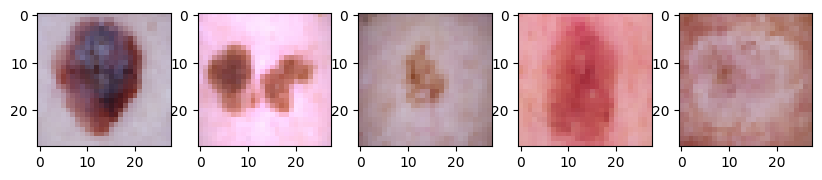

In [7]:
plt.figure(figsize=(10, 10))

for i in range(5):
    num = np.random.randint(0, 8000)
    plt.subplot(1, 5, i+1)
    plt.imshow(image[num].reshape(28, 28, 3))
    
plt.show()
    

In [8]:
num_classes = len(data['label'].unique())

In [9]:
x = data.drop(columns=['label']).values

In [10]:
y = data['label']

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes=num_classes)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
x_train = x_train.reshape(-1, 28, 28, 3).astype('float32')/255

In [14]:
x_test = x_test.reshape(-1, 28, 28, 3).astype('float32')/255

In [15]:
from keras.api.models import Sequential
from keras.api.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.utils import to_categorical

In [16]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-19 16:50:25.708308: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-05-19 16:50:25.708338: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-19 16:50:25.708345: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: fisica6-iMac
2025-05-19 16:50:2

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [18]:
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [19]:
history = model.fit(x_train, y_train, epochs=78, batch_size=64, callbacks=[stop])

Epoch 1/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - categorical_accuracy: 0.6413 - loss: 1.2119
Epoch 2/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - categorical_accuracy: 0.6743 - loss: 0.9197
Epoch 3/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - categorical_accuracy: 0.6841 - loss: 0.8876
Epoch 4/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - categorical_accuracy: 0.6963 - loss: 0.8397
Epoch 5/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - categorical_accuracy: 0.7031 - loss: 0.8270
Epoch 6/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - categorical_accuracy: 0.7170 - loss: 0.7956
Epoch 7/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - categorical_accuracy: 0.7195 - loss: 0.7598
Epoch 8/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - categorical_accuracy: 0.7283 - loss: 0.7510
Epoch 9/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - categorical_accuracy: 0.7430 - loss: 0.6906
Epoch 10/78
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - categorical_accuracy: 0.7448 - loss: 0.6810
Epoch 1

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - categorical_accuracy: 0.7302 - loss: 1.5476   


In [21]:
loss, accuracy

(1.5966213941574097, 0.7254118919372559)

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
y_pred_pro = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 


In [24]:
y_pred = [np.argmax(x) for x in y_pred_pro]
y_test = [np.argmax(x) for x in y_test]

In [25]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[  26,   14,    7,    0,    8,    0,   12],
       [  10,   35,   16,    3,   17,    0,    7],
       [  12,   13,   94,    0,   74,    3,   31],
       [   0,    4,    1,    6,    7,    0,    0],
       [   3,   16,   49,    1, 1186,    6,   86],
       [   0,    2,    0,    0,    4,   15,    2],
       [   7,    5,   22,    1,  105,    2,   91]])

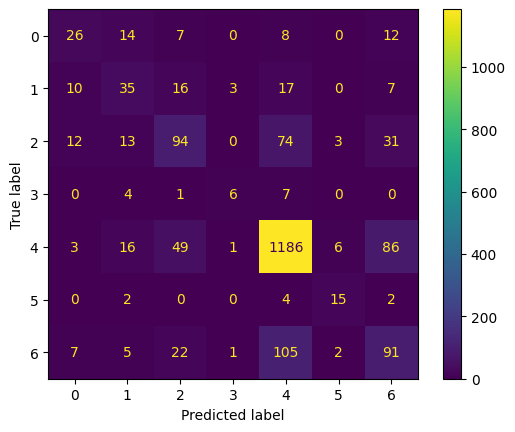

In [26]:
ConfusionMatrixDisplay(matrix).plot()
plt.show()

In [28]:
index = np.random.randint(1, 2000, 1)
y_pred_i = model.predict(x_train[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [29]:
prediction = np.argmax(y_pred_i)
prediction

np.int64(4)

In [30]:
y_train[index]

array([[0., 0., 0., 0., 1., 0., 0.]])

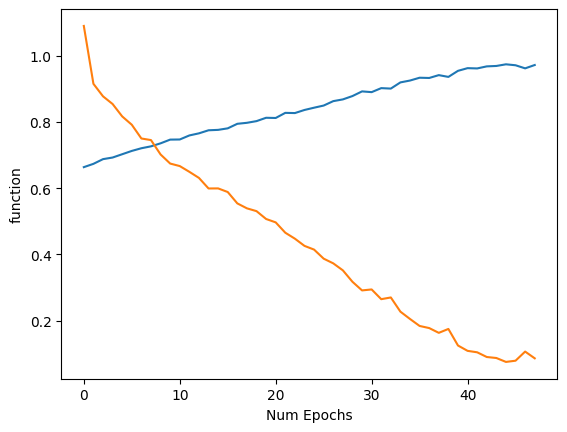

In [35]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Num Epochs')
plt.ylabel('function')
plt.show()